In [1]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
! mkdir ~/.kaggle

In [3]:
! cp kaggle.json ~/.kaggle/

In [4]:
! chmod 600 ~/.kaggle/kaggle.json

In [11]:
from google.colab import files

In [16]:
!kaggle datasets download -d brsdincer/garbage-collective-data-for-nature-conservation

 95% 231M/243M [00:02<00:00, 127MB/s]
100% 243M/243M [00:02<00:00, 116MB/s]


In [17]:
!unzip garbage-collective-data-for-nature-conservation

Streaming output truncated to the last 5000 lines.
  inflating: Garbage_Collective_Data/paper/paper454.jpg  
  inflating: Garbage_Collective_Data/paper/paper455.jpg  
  inflating: Garbage_Collective_Data/paper/paper456.jpg  
  inflating: Garbage_Collective_Data/paper/paper457.jpg  
  inflating: Garbage_Collective_Data/paper/paper458.jpg  
  inflating: Garbage_Collective_Data/paper/paper459.jpg  
  inflating: Garbage_Collective_Data/paper/paper46.jpg  
  inflating: Garbage_Collective_Data/paper/paper460.jpg  
  inflating: Garbage_Collective_Data/paper/paper461.jpg  
  inflating: Garbage_Collective_Data/paper/paper462.jpg  
  inflating: Garbage_Collective_Data/paper/paper463.jpg  
  inflating: Garbage_Collective_Data/paper/paper464.jpg  
  inflating: Garbage_Collective_Data/paper/paper465.jpg  
  inflating: Garbage_Collective_Data/paper/paper466.jpg  
  inflating: Garbage_Collective_Data/paper/paper467.jpg  
  inflating: Garbage_Collective_Data/paper/paper468.jpg  
  inflating: Garbage_C

In [19]:
!pip install tflite-model-maker

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 5.3 MB/s 
     |████████████████████████████████| 128 kB 65.1 MB/s 
     |████████████████████████████████| 3.4 MB 49.7 MB/s 
     |████████████████████████████████| 238 kB 75.4 MB/s 
     |████████████████████████████████| 88 kB 7.1 MB/s 
     |████████████████████████████████| 840 kB 44.8 MB/s 
     |████████████████████████████████| 77 kB 6.8 MB/s 
     |████████████████████████████████| 10.9 MB 77.3 MB/s 
     |████████████████████████████████| 60.8 MB 1.2 MB/s 
     |████████████████████████████████| 1.1 MB 69.8 MB/s 
     |████████████████████████████████| 1.3 MB 54.7 MB/s 
     |████████████████████████████████| 25.3 MB 1.2 MB/s 
     |████████████████████████████████| 498.0 MB 10 kB/s 
     |████████████████████████████████| 352 kB 48.3 MB/s 
     |████████████████████████████████| 5.8 MB 55.3 MB/s 
     |█████████████████████████████

In [20]:
from typing import Tuple

from tflite_model_maker.image_classifier import DataLoader
from tflite_model_maker import image_classifier

import tensorflow as tf
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.8/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:53: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.9.0 and strictly below 2.12.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.8.4 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  warnings.warn(


In [21]:
data = DataLoader.from_folder('/content/Garbage_Collective_Data')
train_data, rest_data = data.split(0.8)
validation_data, test_data = rest_data.split(0.5)

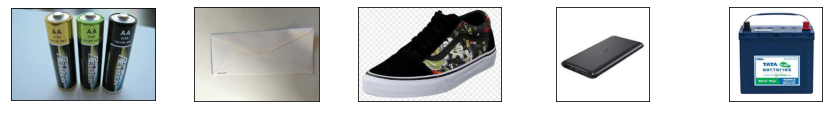

In [22]:
plt.figure(figsize=(15, 10))
for i, (image, label) in enumerate(data.gen_dataset().unbatch().take(5)):
  plt.subplot(5, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  plt.xlabel(data.index_to_label[label.numpy()], color='white')
plt.show()

In [24]:
model = image_classifier.create(
    train_data,
    model_spec='efficientnet_lite0',
    epochs=2,
    validation_data=validation_data
)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 hub_keras_layer_v1v2_1 (Hub  (None, 1280)             3413024   
 KerasLayerV1V2)                                                 
                                                                 
 dropout_1 (Dropout)         (None, 1280)              0         
                                                                 
 dense_1 (Dense)             (None, 12)                15372     
                                                                 
Total params: 3,428,396
Trainable params: 15,372
Non-trainable params: 3,413,024
_________________________________________________________________
None
Epoch 1/2
389/389 [==============================] - 615s 2s/step - loss: 0.9196 - accuracy: 0.8716 - val_loss: 0.7558 - val_accuracy: 0.9365
Epoch 2/2
389/389 [==============================] - 609s 2s/step - loss: 0.7375 - accurac

In [25]:
loss, accuracy = model.evaluate(test_data)
predicts = model.predict_top_k(test_data, k=2)

49/49 [==============================] - 76s 1s/step - loss: 0.7061 - accuracy: 0.9506


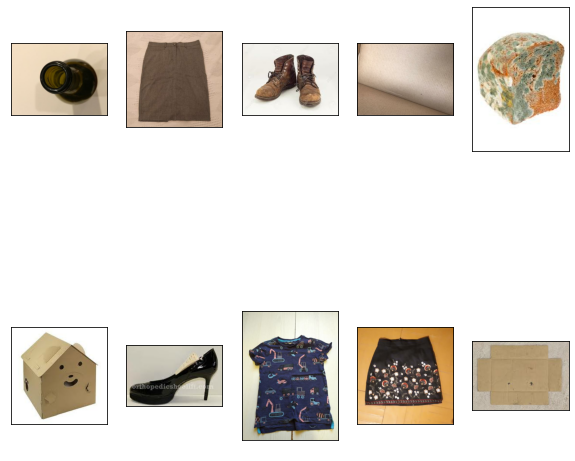

In [26]:
def get_label_color(val1, val2):
  if val1 == val2:
    return 'white'
  else:
    return 'red'

plt.figure(figsize=(10, 10))

for i, (image, label) in enumerate(test_data.gen_dataset().unbatch().take(10)):
  ax = plt.subplot(2, 5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(image.numpy(), cmap=plt.cm.gray)
  predict_label = predicts[i][0][0]
  color = get_label_color(predict_label,
                          test_data.index_to_label[label.numpy()])
  ax.xaxis.label.set_color(color)
  plt.xlabel(predict_label)
plt.show()

In [27]:
model.export(
    export_dir='./models',
    tflite_filename='fruit_classifier.tflite'
)

/usr/local/lib/python3.8/dist-packages/tensorflow/lite/python/convert.py:746: UserWarning: Statistics for quantized inputs were expected, but not specified; continuing anyway.
  warnings.warn("Statistics for quantized inputs were expected, but not "


In [35]:
classes = {0:'battery', 1:'biological' , 2:'brown glass' , 3: 'cardboard' , 4:'clothes' , 5: 'green glass' , 6: 'metal' , 7:'paper', 8:'plastic' , 9:'shoes' , 10:'trash' , 11:'white glass'}

In [36]:
MODEL_PATH = './models/fruit_classifier.tflite'

def get_interpreter(model_path: str) -> Tuple:
    interpreter = tf.lite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()

    input_details = interpreter.get_input_details()
    output_details = interpreter.get_output_details()
    
    return interpreter, input_details, output_details

def predict(image_path: str) -> int:
    interpreter, input_details, output_details = get_interpreter(MODEL_PATH)
    input_shape = input_details[0]['shape']
    img = tf.io.read_file(image_path)
    img = tf.io.decode_image(img, channels=3)
    img = tf.image.resize(img, (input_shape[2], input_shape[2]))
    img = tf.expand_dims(img, axis=0)
    resized_img = tf.cast(img, dtype=tf.uint8)
    
    interpreter.set_tensor(input_details[0]['index'], resized_img)
    interpreter.invoke()

    output_data = interpreter.get_tensor(output_details[0]['index'])
    results = np.squeeze(output_data)
    return classes[np.argmax(results, axis=0)]

In [37]:
print(predict('/content/Garbage_Collective_Data/cardboard/cardboard102.jpg'))

cardboard


In [50]:
import tensorflow as tf
import numpy as np
import cv2
import pathlib

interpreter = tf.lite.Interpreter(model_path="/content/models/fruit_classifier.tflite")

input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

print(input_details)
print(output_details)

interpreter.allocate_tensors()

def draw_rect(image, box):
    y_min = int(max(1, (box[0] * image.height)))
    x_min = int(max(1, (box[1] * image.width)))
    y_max = int(min(image.height, (box[2] * image.height)))
    x_max = int(min(image.width, (box[3] * image.width)))
    
    # draw a rectangle on the image
    cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (255, 255, 255), 2)


for file in pathlib.Path('/content/Garbage_Collective_Data/trash').iterdir():

    if file.suffix != '.jpg' and file.suffix != '.png':
        continue
    
    img = cv2.imread(r"{}".format(file.resolve()))
    new_img = cv2.resize(img, (224, 224))
    interpreter.set_tensor(input_details[0]['index'], [new_img])

    interpreter.invoke()
    rects = interpreter.get_tensor(
        output_details[0]['index'])

    scores = interpreter.get_tensor(
        output_details[2]['index'])
    
    for index, score in enumerate(scores[0]):
        if score > 0.5:
          draw_rect(new_img,rects[0][index])
          
    cv2.imshow("image", new_img)
    cv2.waitKey(0)

[{'name': 'input_2', 'index': 0, 'shape': array([  1, 224, 224,   3], dtype=int32), 'shape_signature': array([ -1, 224, 224,   3], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.003921568859368563, 0), 'quantization_parameters': {'scales': array([0.00392157], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]
[{'name': 'Identity', 'index': 168, 'shape': array([ 1, 12], dtype=int32), 'shape_signature': array([-1, 12], dtype=int32), 'dtype': <class 'numpy.uint8'>, 'quantization': (0.00390625, 0), 'quantization_parameters': {'scales': array([0.00390625], dtype=float32), 'zero_points': array([0], dtype=int32), 'quantized_dimension': 0}, 'sparsity_parameters': {}}]


IndexError: ignored

In [52]:
from google.colab.patches import cv2_imshow

(162, 310, 3)
(1, 12)


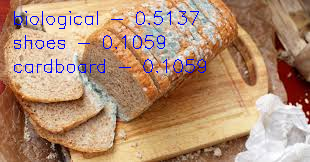

In [56]:
"""
Run classification on images, Press ESC to exit the program
For Raspberry PI, please use `import tflite_runtime.interpreter as tflite` instead
"""

import cv2
import numpy as np

import tensorflow.lite as tflite
# import tflite_runtime.interpreter as tflite

from PIL import Image


def load_labels(label_path):
    r"""Returns a list of labels"""
    with open(label_path, 'r') as f:
        return [line.strip() for line in f.readlines()]


def load_model(model_path):
    r"""Load TFLite model, returns a Interpreter instance."""
    interpreter = tflite.Interpreter(model_path=model_path)
    interpreter.allocate_tensors()
    return interpreter


def process_image(interpreter, image, input_index, k=3):
    r"""Process an image, Return top K result in a list of 2-Tuple(confidence_score, label)"""
    input_data = np.expand_dims(image, axis=0)  # expand to 4-dim

    # Process
    interpreter.set_tensor(input_index, input_data)
    interpreter.invoke()

    # Get outputs
    output_details = interpreter.get_output_details()
    output_data = interpreter.get_tensor(output_details[0]['index'])
    print(output_data.shape)  # (1, 1001)
    output_data = np.squeeze(output_data)

    # Get top K result
    top_k = output_data.argsort()[-k:][::-1]  # Top_k index
    result = []
    for i in top_k:
        score = float(output_data[i] / 255.0)
        result.append((i, score))

    return result


def display_result(top_result, frame, labels):
    r"""Display top K result in top right corner"""
    font = cv2.FONT_HERSHEY_SIMPLEX
    size = 0.6
    color = (255, 0, 0)  # Blue color
    thickness = 1

    for idx, (i, score) in enumerate(top_result):
        # print('{} - {:0.4f}'.format(label, score))
        x = 12
        y = 24 * idx + 24
        cv2.putText(frame, '{} - {:0.4f}'.format(labels[i], score),
                    (x, y), font, size, color, thickness)

    cv2_imshow(frame)


if __name__ == "__main__":

    model_path = '/content/models/fruit_classifier.tflite'
    #label_path = 'data/labels_mobilenet_quant_v1_224.txt'
    image_path = '/content/Garbage_Collective_Data/biological/biological112.jpg'

    interpreter = load_model(model_path)
    labels = ['battery', 'biological' , 'brown glass' , 'cardboard' , 'clothes' , 'green glass' , 'metal' , 'paper', 'plastic' , 'shoes' , 'trash' , 'white glass']

    input_details = interpreter.get_input_details()
    # Get Width and Height
    input_shape = input_details[0]['shape']
    height = input_shape[1]
    width = input_shape[2]

    # Get input index
    input_index = input_details[0]['index']

    frame = cv2.imread(image_path, cv2.IMREAD_COLOR)
    print(frame.shape)

    image = Image.fromarray(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))
    image = image.resize((width, height))

    top_result = process_image(interpreter, image, input_index)
    display_result(top_result, frame, labels)

    key = cv2.waitKey(0)
    if key == 27:  # esc
        cv2.destroyAllWindows()